In [189]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

factory = PokemonFactory("pokemon.json")

pokeballs=["pokeball", "ultraball", "fastball", "heavyball"]
pokemon_names = ["jolteon","caterpie","snorlax","onix","mewtwo"]

def create_pokemons(names=pokemon_names,status=StatusEffect.NONE, level=100, life=1):
    pokemons=[]
    for name in names:
        pokemons.append(factory.create(name, level, status, life))
    return pokemons

pokemons= create_pokemons()


# Ejercicio 1

### Item a

En este gráfico se puede ver para cada combinación de pokemon y pokebola, la probabilidad de captura promedio luego de realizar 100 intentos de captura.

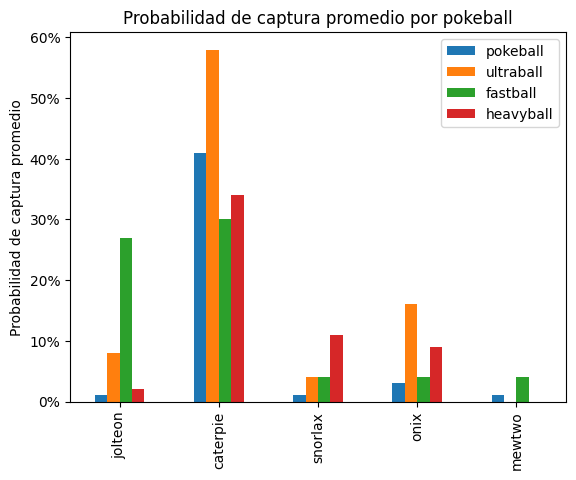

In [190]:
pokemons = create_pokemons()

def pokemon_stats():
    data = {pokeball: [] for pokeball in pokeballs}
    for pokeball in pokeballs:
        for pokemon in pokemons:
            results = []
            for _ in range(100):             
                results.append(attempt_catch(pokemon, pokeball)[0])
            average = sum(results) / len(results)*100
            data[pokeball].append(average)

    df = pd.DataFrame(data, index=pokemon_names)
    formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))

    ax = df.plot(kind='bar')
    ax.yaxis.set_major_formatter(formatter)
    plt.ylabel('Probabilidad de captura promedio')
    plt.title('Probabilidad de captura promedio por pokeball')
    plt.show()

pokemon_stats()
 

### Item B

En el siguiente gráfico, se puede ver la efectividad de cada pokebola normalizada, es decir, dividida por la probabilidad de captura de la pokebola base, para cada uno de los pokemones.

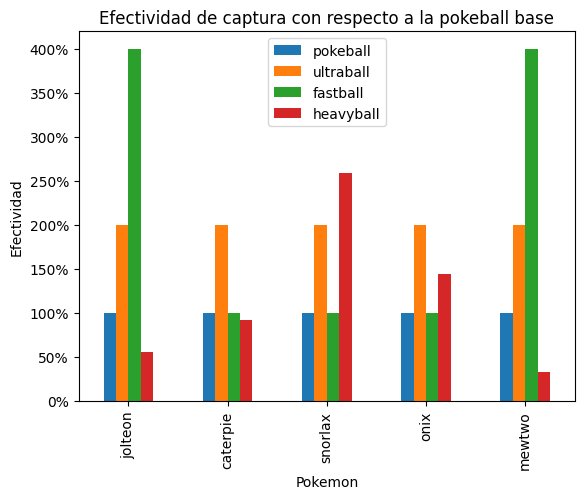

In [191]:
def pokeball_effectiveness():
    base_pokeball = "pokeball"
    data = {pokeball: [] for pokeball in pokeballs}
    for pokeball in pokeballs:
        for pokemon in pokemons:
            base_pokeball_catch_rate = attempt_catch(pokemon, base_pokeball)[1]
            catch_rate = attempt_catch(pokemon, pokeball)[1]
            effectiveness = catch_rate*100 / base_pokeball_catch_rate
            data[pokeball].append(effectiveness)
    
    df = pd.DataFrame(data, index=pokemon_names)
    formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
    ax= df.plot(kind='bar')
    ax.yaxis.set_major_formatter(formatter)
    plt.title('Efectividad de captura con respecto a la pokeball base')
    plt.ylabel('Efectividad')
    plt.xlabel('Pokemon')
    plt.show()    
   

pokeball_effectiveness()


Se pueden hacer varias apreciaciones, como por ejemplo que la ultraball tiene siempre el doble de probabilidad de captura que la pokeball estándar, independientemente del pokemon a capturar. 

Por otro lado, la fastball y la heavyball dependen del pokemon. Por ejemplo, para snorlax que es grande y lento la heavyball es la más efectiva, mientras que para mewtwo que es más ágil la fastball es la más efectiva, mientras que la heavyball tiene una efectividad casi nula.

## Ejercicio 2

### Item A

En el gráfico a continuación se presenta la efectividad de captura de la pokeball estándar para cada uno de los pokemones, dependiendo del estado del pokemon. Los valores se encuentran normalizados, es decir, se dividieron por la efectividad del estado normal.

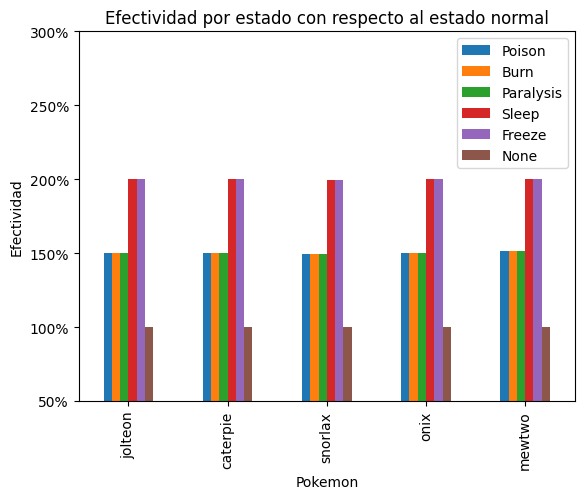

In [192]:
data = {status.name.capitalize(): [] for status in StatusEffect}
for status in StatusEffect:
    pokemons = create_pokemons(status=status)
    base_pokemons = create_pokemons()
    for index, pokemon in enumerate(pokemons):
        base_catch_rate = attempt_catch(base_pokemons[index], "pokeball")[1]
        catch_rate = attempt_catch(pokemon, "pokeball")[1]
        catch_rate = (catch_rate / base_catch_rate) * 100
        data[status.name.capitalize()].append(catch_rate)
    
df = pd.DataFrame(data, index=pokemon_names)
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))

ax = df.plot(kind='bar')
ax.yaxis.set_major_formatter(formatter)
plt.ylabel('Efectividad')
plt.xlabel('Pokemon')
plt.ylim(50, 300)
plt.title("Efectividad por estado con respecto al estado normal")
plt.show()    

### Item B

En este gráfico se muestra la probabilidad de captura del pokemón Caterpie en función de la vida del mismo. Se puede ver el promedio de 100 intentos de captura con un noise de 0.2 y el intervalo de confianza del 95%

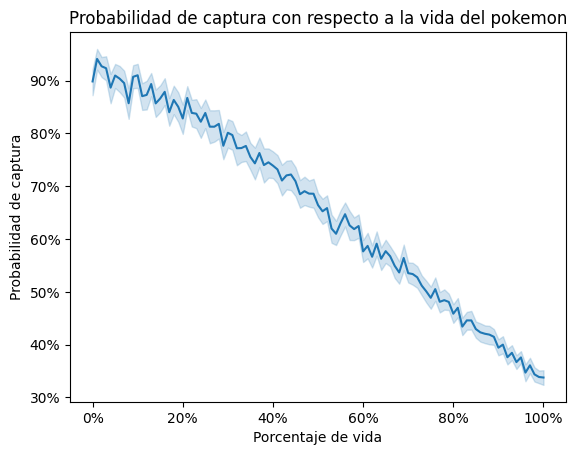

In [193]:
import seaborn as sns

catch_rate_noise = []
catch_rate_noise_avg = []
life_values = range(0,101)
for life in life_values:
    pokemon = factory.create("caterpie", 100, StatusEffect.NONE, life/100)
    aux=[]
    for _ in range(100):
        aux.append(attempt_catch(pokemon, "pokeball", 0.2)[1]*100)
    catch_rate_noise.append(aux)
    catch_rate_noise_avg.append(np.average(aux))

# Create a DataFrame from catch_rate_noise
df = pd.DataFrame(catch_rate_noise).T

# Melt the DataFrame to long format
df = df.melt(var_name="Porcentaje de vida", value_name="Probabilidad de captura")
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax=sns.lineplot(data=df, x="Porcentaje de vida", y="Probabilidad de captura")
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
ax.title.set_text('Probabilidad de captura con respecto a la vida del pokemon')

plt.show()

### Item C


Para este gráfico se utilizó el pokemon Jolteon. 

Primero se calculó la probabilidad de captura del caso base, en el que el nivel era 100, la vida 1 y no tenía ningún estado. 

Luego se calculó la probabilidad llevando cada uno de los parámetros al extremo, mientras que el resto de los parámetros se mantenían constantes.

Así, se llevó la vida a 0.01, el nivel a 1 y se usó la fastball.

Cada uno de estos resultados fue normalizado, dividiendo por el caso base.


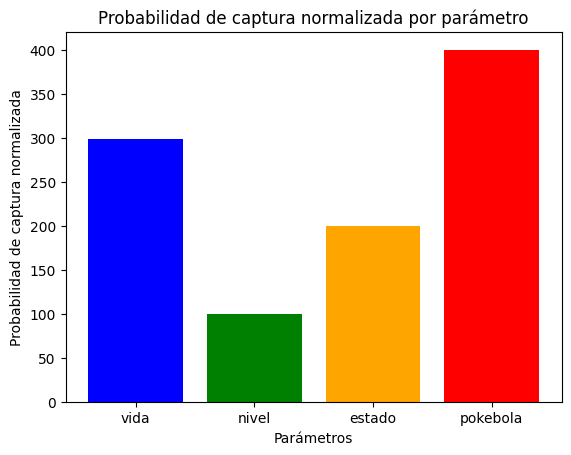

In [194]:
#vida, condición de salud, pokebola, nivel

# jolteon

param_names = ["vida", "nivel", "estado", "pokebola"]
base_case= attempt_catch(factory.create("jolteon", 100, StatusEffect.NONE, 1), "pokeball")[1]

min_life_attempt= attempt_catch(factory.create("jolteon", 100, StatusEffect.NONE, 0.01), "pokeball")[1]
normalized_min_life_attempt= min_life_attempt*100/base_case

min_level_attempt= attempt_catch(factory.create("jolteon", 1, StatusEffect.NONE, 1), "pokeball")[1]
normalized_min_level_attempt= min_level_attempt*100/base_case

sleep_status_attempt= attempt_catch(factory.create("jolteon", 100, StatusEffect.SLEEP, 1), "pokeball")[1]
normalized_sleep_status_attempt= sleep_status_attempt*100/base_case

fastball_attempt= attempt_catch(factory.create("jolteon", 100, StatusEffect.NONE, 1), "fastball")[1]
normalized_fastball_attempt= fastball_attempt*100/base_case

normalized_values = [normalized_min_life_attempt, normalized_min_level_attempt, normalized_sleep_status_attempt, normalized_fastball_attempt]

# Create bar graph
plt.bar(param_names, normalized_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Parámetros')
plt.ylabel('Probabilidad de captura normalizada')
plt.title('Probabilidad de captura normalizada por parámetro')
plt.show()

Se puede ver que el parámetro que hace mayor diferencia en la probabilidad de captura es el tipo de pokebola, mientras que el nivel es el que tiene menor efecto.

### Item D

Para este análisis se utitlizó el pokemón Jolteon.
Se grafican para cada uno de los estados representativos (estado normal, quemado y dormido) la eficacia de captura calculada a partir de la probabilidad de captura y el costo necesario para llegar a esos parámetros. Los costos fueron definidos según conocimiento realista del juego. 
De esta forma, se puede analizar qué combinación de pokebola y vida es más conveniente para capturar a Jolteon.

Mayor eficiencia: 0.159 con la Fastball y 80% de vida


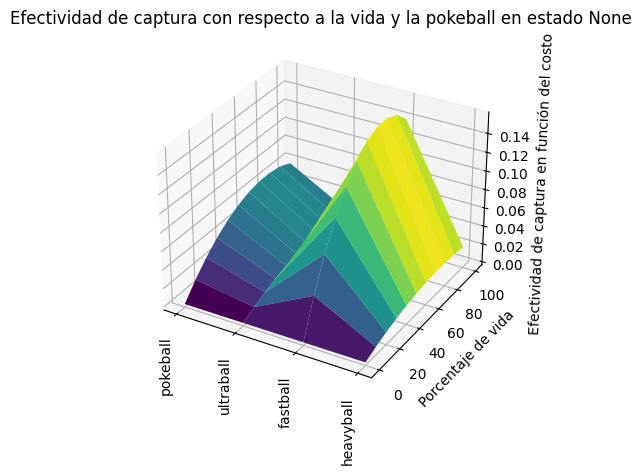

Mayor eficiencia: 0.127 con la Fastball y 80% de vida


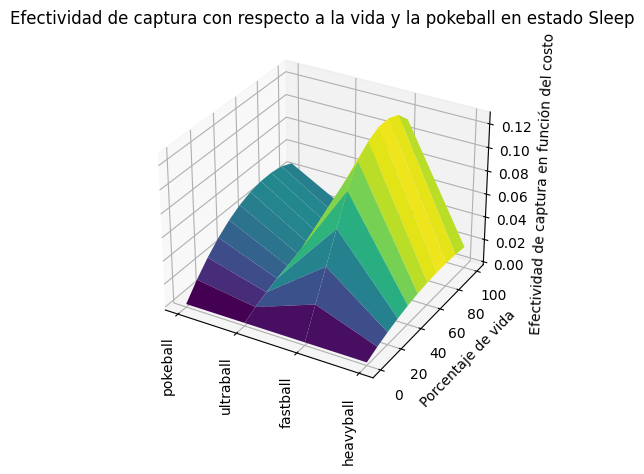

Mayor eficiencia: 0.167 con la Fastball y 80% de vida


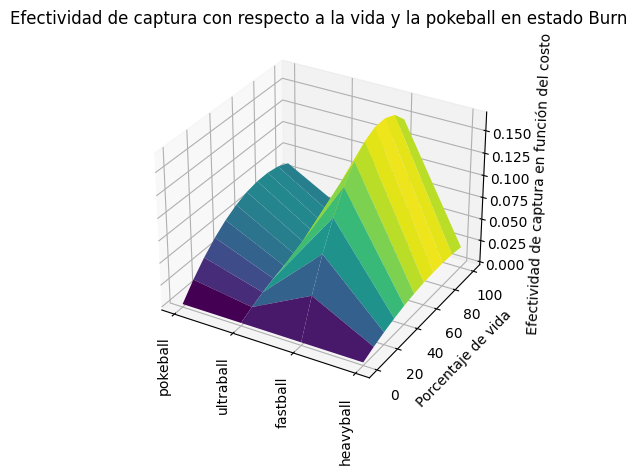

In [229]:
#Analizarlo en un caso más realista
class pokeball_weighted:
    def __init__(self, pokeball, weight):
        self.pokeball = pokeball
        self.weight = weight
        
class status_weighted:
    def __init__(self, status, weight):
        self.status = status
        self.weight = weight


class life_weighted:
    def __init__(self, life, weight):
        self.life = life
        self.weight = weight
    def __str__(self):
        return str(self.life) + " - " + str(self.weight)



status_values=[StatusEffect.NONE, StatusEffect.SLEEP, StatusEffect.BURN]
pokeball_values=["pokeball", "ultraball", "fastball", "heavyball"]

pokeball_values=[pokeball_weighted("pokeball", 0), pokeball_weighted("ultraball", 0.8), pokeball_weighted("fastball", 0.4), pokeball_weighted("heavyball", 0.4)]

status_values=[status_weighted(StatusEffect.NONE, 0), status_weighted(StatusEffect.SLEEP, 0.6), status_weighted(StatusEffect.BURN, 0.3)]

life_values = [life_weighted(i, (100-i)/100) for i in range(0, 101, 10)]

def catch_with_values(life, pokeball, status):
     return attempt_catch(factory.create("jolteon", 100, status, life/100), pokeball)[1]

def catch_with_values_weighted(life, pokeball, status):
    return catch_with_values(life.life, pokeball.pokeball, status.status) * (1- life.weight) * (1- pokeball.weight) * (1- status.weight)

def graph_by_status(status):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = range(len(pokeball_values))
    y = range(len(life_values))
    x, y = np.meshgrid(x, y)
    z = np.array([[catch_with_values_weighted(life, pokeball, status) for pokeball in pokeball_values] for life in life_values])
    ax.plot_surface(x, y*10, z, cmap='viridis')

    # Set the x-tick labels to the names of the pokeballs
    pokeball_names = [pokeball.pokeball for pokeball in pokeball_values]
    ax.set_xticks(range(len(pokeball_values)))
    ax.set_xticklabels(pokeball_names, rotation='vertical')
    ax.set_ylabel('Porcentaje de vida')
    ax.set_zlabel('Efectividad de captura en función del costo')
    ax.set_title('Efectividad de captura con respecto a la vida y la pokeball en estado ' + status.status.name.capitalize())

    max_value = np.amax(z)
    max_coords = np.unravel_index(np.argmax(z), z.shape)
    print(f"Mayor eficiencia: {format(max_value, '.3f')} con la {pokeball_values[max_coords[1]].pokeball.capitalize()} y {life_values[max_coords[0]].life}% de vida")
    plt.show()



for status in status_values:
    graph_by_status(status)



De estos graficos, se puede concluir que para Jolteon lo mas conveniente es  usar una fastball con 80% de vida mientras el pokemon está quemado o envenenado, según los pesos asignados.

### Item E

Mayor eficiencia: 0.169 con la Fastball y 80% de vida


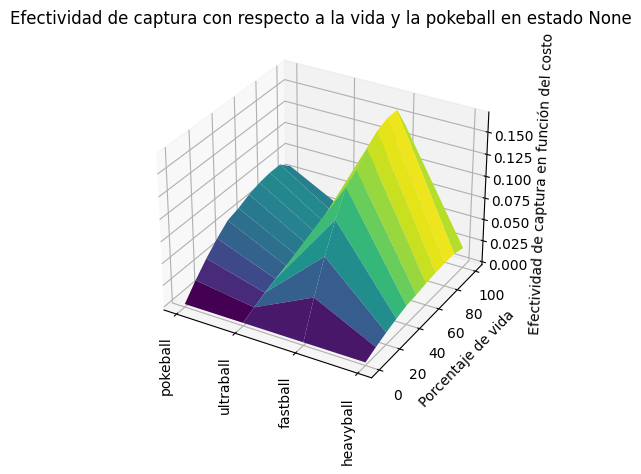

Mayor eficiencia: 0.135 con la Fastball y 90% de vida


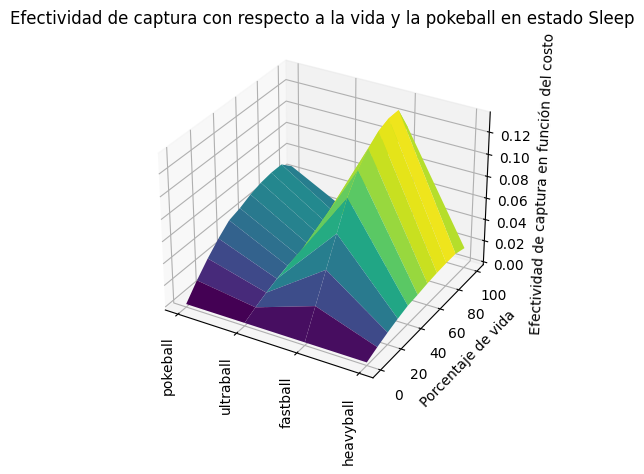

Mayor eficiencia: 0.177 con la Fastball y 90% de vida


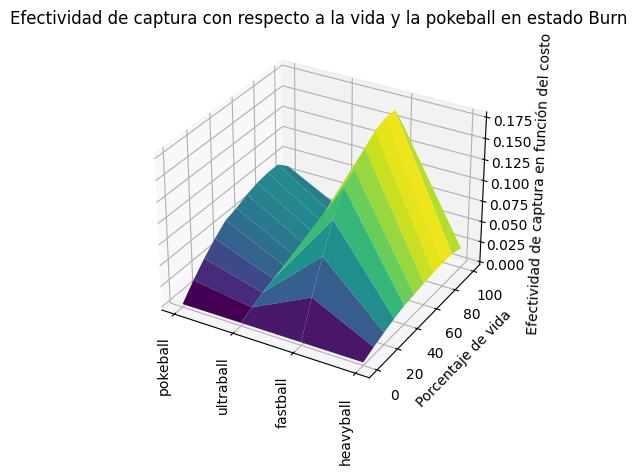

In [230]:
#Idem D pero considerando el nivel

class pokeball_weighted:
    def __init__(self, pokeball, weight):
        self.pokeball = pokeball
        self.weight = weight
        
class status_weighted:
    def __init__(self, status, weight):
        self.status = status
        self.weight = weight


class life_weighted:
    def __init__(self, life, weight):
        self.life = life
        self.weight = weight
    def __str__(self):
        return str(self.life) + " - " + str(self.weight)



status_values=[StatusEffect.NONE, StatusEffect.SLEEP, StatusEffect.BURN]
pokeball_values=["pokeball", "ultraball", "fastball", "heavyball"]

pokeball_values=[pokeball_weighted("pokeball", 0), pokeball_weighted("ultraball", 0.8), pokeball_weighted("fastball", 0.4), pokeball_weighted("heavyball", 0.4)]

status_values=[status_weighted(StatusEffect.NONE, 0), status_weighted(StatusEffect.SLEEP, 0.6), status_weighted(StatusEffect.BURN, 0.3)]

life_values = [life_weighted(i, (100-i)/100) for i in range(0, 101, 10)]

def catch_with_values(life, pokeball, status):
     return attempt_catch(factory.create("jolteon", 1, status, life/100), pokeball)[1]

def catch_with_values_weighted(life, pokeball, status):
    return catch_with_values(life.life, pokeball.pokeball, status.status) * (1- life.weight) * (1- pokeball.weight) * (1- status.weight)

def graph_by_status(status):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = range(len(pokeball_values))
    y = range(len(life_values))
    x, y = np.meshgrid(x, y)
    z = np.array([[catch_with_values_weighted(life, pokeball, status) for pokeball in pokeball_values] for life in life_values])
    ax.plot_surface(x, y*10, z, cmap='viridis')

    # Set the x-tick labels to the names of the pokeballs
    pokeball_names = [pokeball.pokeball for pokeball in pokeball_values]
    ax.set_xticks(range(len(pokeball_values)))
    ax.set_xticklabels(pokeball_names, rotation='vertical')
    ax.set_ylabel('Porcentaje de vida')
    ax.set_zlabel('Efectividad de captura en función del costo')
    ax.set_title('Efectividad de captura con respecto a la vida y la pokeball en estado ' + status.status.name.capitalize())

    max_value = np.amax(z)
    max_coords = np.unravel_index(np.argmax(z), z.shape)
    print(f"Mayor eficiencia: {format(max_value, '.3f')} con la {pokeball_values[max_coords[1]].pokeball.capitalize()} y {life_values[max_coords[0]].life}% de vida")
    plt.show()



for status in status_values:
    graph_by_status(status)






De estos gráficos, se puede concluir que al cambiar el nivel del pokemón de 100 a 1, cambia que la mayor eficiencia de captura se da con un 90% de vida en vez de 80%.